In [1]:
#NB need to use environment with python3.9 or above for ccf_streamlines to run
import nrrd
import numpy as np
import matplotlib.pyplot as plt
import ccf_streamlines.projection as ccfproj
import pathlib
import pandas as pd
import numpy as np
import os
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.colors import LogNorm
import copy

In [73]:
#https://ccf-streamlines.readthedocs.io/en/latest/guide.html


PosixPath('/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a')

In [2]:
reg_dir = pathlib.Path('/nemo/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/LCM_registration/allenccf/allen_ccf_coord')
ROI_path = pathlib.Path('/nemo/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/LCM_registration/rois')
ROI_table = pathlib.Path('/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/LCM_registration/allenccf/ROI_vol.pkl')
allen_converted_path = pathlib.Path('/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/LCM_registration/allenccf/allen_ccf_coord')
convert_to_flat_path = allen_converted_path.parents[1]
reads_path = pathlib.Path("/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/Sequencing/Processed_data/UpdatedApril/preprocessed_seq/Final_processed_sequences")
RTtosample = pd.read_csv(allen_converted_path.parents[2]/ 'Sequencing/Processed_data/UpdatedApril/tube_to_RT.csv')
normalised_barcode_path= pathlib.Path('/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/Sequencing/Processed_data/UpdatedApril/preprocessed_seq_corrected/Final_processed_sequences/barcode_matrix_normalised.pkl')

In [3]:
#download av template to get shape
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
mcc = MouseConnectivityCache(resolution=10)
avg_temp, meta = mcc.get_template_volume()


In [4]:
ROI_flatmap = np.load(convert_to_flat_path/'ROI_flatmap.npy')

In [ ]:
bf_boundary_finder = ccfproj.BoundaryFinder(
    projected_atlas_file=convert_to_flat_path/"flatmap_butterfly.nrrd",
    labels_file=convert_to_flat_path/"labelDescription_ITKSNAPColor.txt",
)

# We get the left hemisphere region boundaries with the default arguments
bf_left_boundaries = bf_boundary_finder.region_boundaries()

# And we can get the right hemisphere boundaries that match up with
# our projection if we specify the same configuration
bf_right_boundaries = bf_boundary_finder.region_boundaries(
    # we want the right hemisphere boundaries, but located in the right place
    # to plot both hemispheres at the same time
    hemisphere='right_for_both',

    # we also want the hemispheres to be adjacent
    view_space_for_other_hemisphere='flatmap_butterfly',
)

In [ ]:
proj_top = ccfproj.Isocortex2dProjector(
    # Specify our view lookup file
    convert_to_flat_path/"flatmap_butterfly.h5",

    # Specify our streamline file
    convert_to_flat_path/"surface_paths_10_v3.h5",

    # Specify that we want to project both hemispheres
    hemisphere="both",

    # The top view contains space for the right hemisphere, but is empty.
    # Therefore, we tell the projector to put both hemispheres side-by-side
    view_space_for_other_hemisphere='flatmap_butterfly',
)

In [10]:
ROI_projection_max = proj_top.project_volume(ROI_flatmap)

In [5]:
normalised_barcode_path =pd.read_pickle(normalised_barcode_path)

In [8]:
new_columns= {}
for i, r in RTtosample.iterrows():
    new_columns[r['RT primer']]= r['Tube']

In [9]:
normalised_barcode_path = normalised_barcode_path.rename(columns=new_columns)

In [34]:
barcode_matrix

array([[0.        , 0.        , 0.        , ..., 3.40334639, 0.        ,
        2.61487965],
       [0.        , 0.        , 0.        , ..., 1.36133855, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.72267711, 0.        ,
        2.61487965],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
barcode_matrix = np.zeros((len(normalised_barcode_path), max(normalised_barcode_path.columns.to_list())+1))
#need to (a) take only cortical samples to look at, (b) make non-cortical samples visualisable on separate colour bar
#(c) look at counts only
#(d) show outlines of roi's so you know which one's are being avoided

In [12]:
for column in normalised_barcode_path:
    barcode_matrix[:, column] = normalised_barcode_path[column].to_numpy()

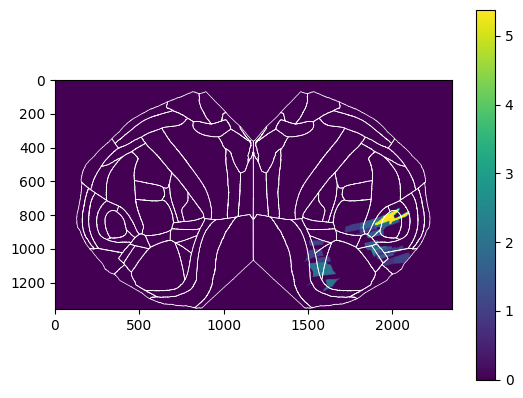

In [50]:

barcode_index= 66#which barcode you want to look at
plt.imshow(np.log(1 + barcode_matrix[barcode_index, ROI_projection_max.astype(int)]).T)
cbar = plt.colorbar()
for k, boundary_coords in bf_left_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)

In [6]:
bf_boundary_finder = ccfproj.BoundaryFinder(
    projected_atlas_file=convert_to_flat_path/"flatmap_butterfly.nrrd",
    labels_file=convert_to_flat_path/"labelDescription_ITKSNAPColor.txt",
)

# We get the left hemisphere region boundaries with the default arguments
bf_left_boundaries = bf_boundary_finder.region_boundaries()

# And we can get the right hemisphere boundaries that match up with
# our projection if we specify the same configuration
bf_right_boundaries = bf_boundary_finder.region_boundaries(
    # we want the right hemisphere boundaries, but located in the right place
    # to plot both hemispheres at the same time
    hemisphere='right_for_both',

    # we also want the hemispheres to be adjacent
    view_space_for_other_hemisphere='flatmap_butterfly',
)

In [13]:
np.unique(ROI_projection_max)

array([ 0.,  6.,  7., 10., 11., 12., 15., 16., 17., 18., 21., 22., 23.,
       24., 26., 27., 28., 31., 32., 33., 34., 35., 36., 37., 41., 43.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 59., 60., 61., 62.,
       63., 64., 65., 70., 81., 82., 83., 84., 85.])

In [7]:
proj_top = ccfproj.Isocortex2dProjector(
    # Specify our view lookup file
    convert_to_flat_path/"flatmap_butterfly.h5",

    # Specify our streamline file
    convert_to_flat_path/"surface_paths_10_v3.h5",

    # Specify that we want to project both hemispheres
    hemisphere="both",

    # The top view contains space for the right hemisphere, but is empty.
    # Therefore, we tell the projector to put both hemispheres side-by-side
    view_space_for_other_hemisphere='flatmap_butterfly',
)

loading path information


100%|██████████| 1016/1016 [00:07<00:00, 141.38it/s]


In [4]:
cortical_areas =[6, 7, 10, 11, 12, 15, 16, 17, 18, 21, 22, 23, 24, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 59, 60, 61, 62, 63, 64, 65, 70, 82, 83, 84, 85, 86]
cortical_samples_table =RTtosample[RTtosample['RT primer'].isin (cortical_areas)]

Load ROI's

In [13]:
#re-get registration info on each ROI
#iterate through individual slices, take average difference in in coordinates in z (which is x axes in allen ccf) for last slice (slice s001 for brain 1), take average of previous slices
add_z = pd.DataFrame(columns=['slice', 'amountz'], dtype=int)
#need to change for mega thick last bit of cortex section, so extend ROI through 3slices
for file in os.listdir(allen_converted_path):
    if file.startswith('allen_ccf_converted_'):
        slice_name = file[20:24]
        slicenum = int(file[21:24])
        if slice_name != 's001' and slice_name != 's012' and slice_name != 's048' and slice_name != 's053':
            slice_before= slicenum-1
            if slice_before >9:
                slicebefore_name = f's0{slice_before}' 
            if slice_before<10:
                slicebefore_name = f's00{slice_before}' 
            [x1a, y1a, z1a, one1] = np.load(allen_converted_path/file)
            [x2a, y2a, z2a, one2] = np.load(allen_converted_path/f'allen_ccf_converted_{slicebefore_name}.npy')
            dif = np.average(x2a.flatten()-x1a.flatten())
            add_z= pd.concat([add_z, pd.DataFrame({'slice': slice_name, 'amountz': dif}, index=[0])], ignore_index=True)

#for slices where the one's before are missing, extend them by the mean of slice z extensions for the others
s001_add =add_z['amountz'].mean()
add_z= pd.concat([add_z, pd.DataFrame({'slice': 's001', 'amountz': s001_add}, index=[0])],ignore_index=True)
s012_add =add_z['amountz'].mean()
add_z= pd.concat([add_z, pd.DataFrame({'slice': 's012', 'amountz': s012_add}, index=[0])],ignore_index=True)
s048_add =add_z['amountz'].mean()
add_z= pd.concat([add_z, pd.DataFrame({'slice': 's048', 'amountz': s048_add}, index=[0])],ignore_index=True)
s053_add =add_z['amountz'].mean()
add_z= pd.concat([add_z, pd.DataFrame({'slice': 's053', 'amountz': s053_add}, index=[0])],ignore_index=True)


In [8]:
empty_frame = np.zeros((avg_temp.shape))

In [13]:
#get e.g. of ROI
for ROI_to_look in os.listdir(ROI_path):
#region = ROI_path/'s015_TUBE6.png'
    region = ROI_path/ROI_to_look
    if ROI_to_look.startswith('s0'):
        slicename = region.stem[0:4]
        tube = region.stem[5:len(region.stem)].split('TUBE', 1)[1]
        if int(tube) in cortical_samples_table['Tube'].to_list():
            [xa, ya, za, one] = np.load(allen_converted_path/f'allen_ccf_converted_{slicename}.npy')
            roi = plt.imread(ROI_path/f'{region}')
            allencoord_roiya = roi*ya
            allencoord_roiza = roi*za
            allencoord_roixa= roi*xa
            z_to_add = add_z.loc[add_z['slice'] == slicename, 'amountz'].iloc[0]

            #convert the x, y, z coordinates to pixel
            pixcoord = []
            for i, axis in enumerate([allencoord_roixa, allencoord_roiya, allencoord_roiza]):
                pixel = np.array(np.round(axis/10), dtype=int)
                pixel[pixel <0] = 0
                pixel[pixel >= empty_frame.shape[i]] = 0
                pixcoord.append(pixel)
            new_coord = np.zeros(pixcoord[0].shape)
            z_add=0
            for stack in range(int(np.round(-z_to_add/10))):
                for i in range(pixcoord[0].shape[0]):
                    for j in range(pixcoord[0].shape[1]):
                        if pixcoord[0][i, j] != 0:
                            new_coord[i,j] = (pixcoord[0][i, j])+z_add
                z_add = z_add+1
                for k in range(pixcoord[0].shape[0]):
                    for l in range(pixcoord[0].shape[1]):
                        x = new_coord[k, l]
                        y = pixcoord[1][k, l]
                        z = pixcoord[2][k, l]
                        if x != 0 and y != 0 and z != 0:
                            empty_frame[int(x), int(y), int(z)] = int(tube)

In [72]:

tab20 = cm.get_cmap('gist_ncar', 250)
tab20_cmap = tab20(np.linspace(0, 1, 20))
new_colors =tab20(np.linspace(0, 1, max(cortical_samples_table.Tube.to_list())))

In [73]:
black = np.array([1/256, 1/256, 1/256, 1])

for i, row in enumerate(new_colors):
    if i == 0:
        new_colors[i, :] = black
    else:
        idx = np.random.randint(20)
        new_colors[i, :] = tab20_cmap[idx]

In [79]:
newcmp = ListedColormap(new_colors)


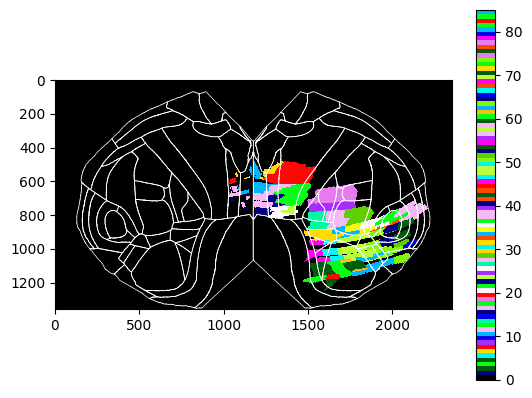

In [133]:
top_projection_max = proj_top.project_volume(empty_frame)

plt.imshow(
    top_projection_max.T, # transpose so that the rostral/caudal direction is up/down
    interpolation='none',
    cmap=newcmp,
)
cbar = plt.colorbar()
for k, boundary_coords in bf_left_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)

In [117]:
# for file in os.listdir(reads_path):
#     barcode_file = reads_path/file
#     if barcode_file.stem.startswith('neuron_counts'):
#         to_read = pd.read_csv(barcode_file) 
#         df = to_read[to_read['counts'] >= 2]
#         counts = df['counts'].sum()
#         #counts =to_read['counts'].sum()
#         sample = barcode_file.stem.split("neuron_counts_BC", 1)[1]
#         tube = RT_convert.loc[int(sample), 'Tube']
#         projection_comp.loc[f'{tube}', 'MAPseq_counts'] = counts

(array([0, 0]), array([0, 0]), array([   0, 1139]))

In [280]:
cortical_samples_table['MAPseq_counts'] = ""
cortical_samples_table['vol'] = ""
cortical_samples_table = cortical_samples_table.set_index('Tube')
RTtosample = RTtosample.set_index('RT primer')


In [245]:
ROI_table =pd.read_pickle(ROI_table)
ROI_table

,slice,tube,z_added,vol (um3),region_pix,unique_regions,region_vol (um3)
0,s051,89,-166.261664,8.712644e+07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[811.0, 820.0, 828.0]","[546474.7261396056, 226754.21134352763, 292139..."
1,s025,13,-193.852449,5.822613e+04,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[314.0, 579.0, 583.0, 638.0, 662.0, 672.0, 849...","[1.9959327290744189, 18.506368704591782, 34.73..."
2,s044,62,-92.104557,2.835437e+07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[421.0, 573.0, 593.0, 613.0, 721.0, 778.0, 821...","[20981.586067660606, 23415.156260339096, 12050..."
3,s050,86,-270.431164,3.550997e+07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[313.0, 482.0, 811.0, 828.0]","[20717.98618400291, 735.8664773136326, 6707.53..."
4,s033,26,-205.094201,2.986499e+07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[113.0, 201.0, 450.0, 478.0, 577.0, 625.0, 670...","[18344.831733498955, 4102.702739386679, 12204...."
...,...,...,...,...,...,...,...
204,s049,86,-430.722325,1.778574e+08,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[10.0, 17.0, 26.0, 128.0, 313.0, 482.0, 811.0,...","[88637.5929790318, 269367.2240609419, 134824.5..."
205,s018,7,-26.958990,8.936080e+06,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[656.0, 767.0, 962.0, 1021.0]","[17184.769100357382, 24875.940903175375, 26270..."
206,s015,6,-227.539316,1.840504e+07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[211.0, 656.0, 767.0, 935.0, 962.0, 1015.0]","[532.5533178825631, 19106.93946334098, 7445.85..."
207,s049,88,-430.722325,3.928057e+07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[105.0, 114.0, 122.0, 146.0, 190.0, 354.0, 574...","[54927.69785043876, 6844.016051103662, 30089.4..."


In [254]:
finalpix = pd.DataFrame(columns=['tube', 'combined_pix', 'vol (um3)'], dtype=int)
result = ROI_table.groupby(['tube']).agg(', '.join).reset_index()
for row, tube in result['tube'].iteritems():
    newdf = ROI_table[ROI_table['tube']==tube].reset_index()
    #for count, value in enumerate(newdf):
    for r, t in newdf['tube'].iteritems():
        if r ==0 :
            array = newdf.loc[r, 'region_pix']
            vol = newdf.loc[r, 'vol (um3)']
        if r > 0:
            nextarray = newdf.loc[r, 'region_pix']
            vol = vol + newdf.loc[r, 'vol (um3)']
            array = np.concatenate((array, nextarray), axis=None)
    finalpix= finalpix.append({'tube': tube, 'combined_pix': array, 'vol (um3)': vol},ignore_index=True)

/tmp/ipykernel_24433/1609940788.py:2: FutureWarning: ['z_added', 'vol (um3)', 'region_pix', 'unique_regions', 'region_vol (um3)'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  result = ROI_table.groupby(['tube']).agg(', '.join).reset_index()
/tmp/ipykernel_24433/1609940788.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row, tube in result['tube'].iteritems():
/tmp/ipykernel_24433/1609940788.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for r, t in newdf['tube'].iteritems():
/tmp/ipykernel_24433/1609940788.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalpix= finalpix.append({'tube': tube, 'combined_pix': array, 'vol (um3)': vol},ignore_index=True)
/tmp/ipykernel_

In [256]:
finalpix = finalpix.set_index('tube')
normalised_barcode_path =pd.read_pickle(normalised_barcode_path)

In [264]:
# for file in os.listdir(reads_path):
#     barcode_file = reads_path/file
#     if barcode_file.stem.startswith('neuron_counts'):
#         to_read = pd.read_csv(barcode_file) 
#         df = to_read[to_read['counts'] >= 2]
#         counts = df['counts'].sum()
#         #counts =to_read['counts'].sum()
#         sample = int(barcode_file.stem.split("neuron_counts_BC", 1)[1])
#         if int(sample) in cortical_areas:
#             index = RTtosample.loc[sample].Tube
#             cortical_samples_table.at[index, 'MAPseq_counts'] = counts
#             cortical_samples_table.at[index, 'vol'] = finalpix.loc[str(index)]['vol (um3)']

In [287]:

cortical_samples_table_filtered = cortical_samples_table[cortical_samples_table['RT primer'].isin(normalised_barcode_path.columns)]
for sample in normalised_barcode_path.columns:
    if sample in cortical_samples_table_filtered['RT primer'].to_list():
        index = RTtosample.loc[sample].Tube
        cortical_samples_table_filtered.at[index, 'MAPseq_counts'] = normalised_barcode_path[sample].sum()
        cortical_samples_table_filtered.at[index, 'vol'] = finalpix.loc[str(index)]['vol (um3)']

In [292]:
cortical_samples_table_filtered['density'] = cortical_samples_table_filtered['MAPseq_counts']/cortical_samples_table_filtered['vol']

In [294]:
empty_count_frame = np.zeros((avg_temp.shape))

In [301]:
cortical_samples_table_filtered.loc[int(10)].density 

4.550470286232809e-07

In [307]:
#get e.g. of ROI
for ROI_to_look in os.listdir(ROI_path):
#region = ROI_path/'s015_TUBE6.png'
    region = ROI_path/ROI_to_look
    if ROI_to_look.startswith('s0'):
        slicename = region.stem[0:4]
        tube = region.stem[5:len(region.stem)].split('TUBE', 1)[1]
        if int(tube) in cortical_samples_table_filtered.index.to_list():
            [xa, ya, za, one] = np.load(allen_converted_path/f'allen_ccf_converted_{slicename}.npy')
            roi = plt.imread(ROI_path/f'{region}')
            allencoord_roiya = roi*ya
            allencoord_roiza = roi*za
            allencoord_roixa= roi*xa
            z_to_add = add_z.loc[add_z['slice'] == slicename, 'amountz'].iloc[0]

            #convert the x, y, z coordinates to pixel
            pixcoord = []
            for i, axis in enumerate([allencoord_roixa, allencoord_roiya, allencoord_roiza]):
                pixel = np.array(np.round(axis/10), dtype=int)
                pixel[pixel <0] = 0
                pixel[pixel >= empty_frame.shape[i]] = 0
                pixcoord.append(pixel)
            new_coord = np.zeros(pixcoord[0].shape)
            z_add=0
            for stack in range(int(np.round(-z_to_add/10))):
                for i in range(pixcoord[0].shape[0]):
                    for j in range(pixcoord[0].shape[1]):
                        if pixcoord[0][i, j] != 0:
                            new_coord[i,j] = (pixcoord[0][i, j])+z_add
                z_add = z_add+1
                for k in range(pixcoord[0].shape[0]):
                    for l in range(pixcoord[0].shape[1]):
                        x = new_coord[k, l]
                        y = pixcoord[1][k, l]
                        z = pixcoord[2][k, l]
                        if x != 0 and y != 0 and z != 0:
                            empty_count_frame[int(x), int(y), int(z)] = cortical_samples_table_filtered.loc[int(tube)].density 

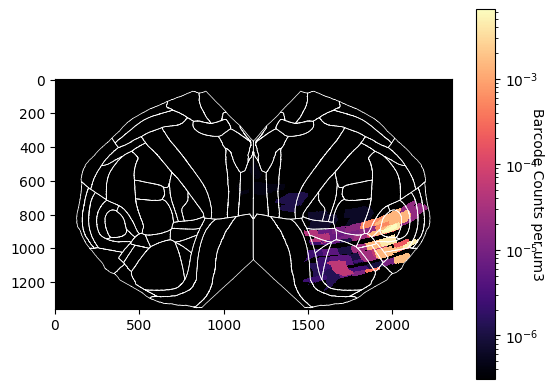

In [316]:
top_projection_max = proj_top.project_volume(empty_count_frame)
import copy
my_cmap = copy.copy(plt.cm.get_cmap('magma')) # copy the default cmap
my_cmap.set_bad((0,0,0))
plt.imshow(
    top_projection_max.T, # transpose so that the rostral/caudal direction is up/down
    interpolation='none',
    cmap=my_cmap, norm=LogNorm()
)
cbar = plt.colorbar()
cbar.set_label('Barcode Counts per um3', rotation=270)
for k, boundary_coords in bf_left_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)

Look at individual barcodes

In [8]:
normalised_barcode_path =pd.read_pickle(normalised_barcode_path)

In [9]:
ROI_flatmap = np.load(convert_to_flat_path/'ROI_flatmap.npy')

ROI_table =pd.read_pickle(ROI_table)
finalpix = pd.DataFrame(columns=['tube', 'combined_pix', 'vol (um3)'], dtype=int)
result = ROI_table.groupby(['tube']).agg(', '.join).reset_index()
for row, tube in result['tube'].iteritems():
    newdf = ROI_table[ROI_table['tube']==tube].reset_index()
    #for count, value in enumerate(newdf):
    for r, t in newdf['tube'].iteritems():
        if r ==0 :
            array = newdf.loc[r, 'region_pix']
            vol = newdf.loc[r, 'vol (um3)']
        if r > 0:
            nextarray = newdf.loc[r, 'region_pix']
            vol = vol + newdf.loc[r, 'vol (um3)']
            array = np.concatenate((array, nextarray), axis=None)
    finalpix= finalpix.append({'tube': tube, 'combined_pix': array, 'vol (um3)': vol},ignore_index=True)

/tmp/ipykernel_2073/3445647675.py:5: FutureWarning: ['z_added', 'vol (um3)', 'region_pix', 'unique_regions', 'region_vol (um3)'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  result = ROI_table.groupby(['tube']).agg(', '.join).reset_index()
/tmp/ipykernel_2073/3445647675.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row, tube in result['tube'].iteritems():
/tmp/ipykernel_2073/3445647675.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for r, t in newdf['tube'].iteritems():
/tmp/ipykernel_2073/3445647675.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalpix= finalpix.append({'tube': tube, 'combined_pix': array, 'vol (um3)': vol},ignore_index=True)
/tmp/ipykernel_2073

In [10]:
cortical_areas =[6, 7, 10, 11, 12, 15, 16, 17, 18, 21, 22, 23, 24, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 59, 60, 61, 62, 63, 64, 65, 70, 82, 83, 84, 85, 86]
cortical_samples_table =RTtosample[RTtosample['RT primer'].isin (cortical_areas)]
cortical_samples_barcodes = normalised_barcode_path.filter(cortical_samples_table['RT primer'].to_list())
cortical_samples_table_filtered = cortical_samples_table[cortical_samples_table['RT primer'].isin(normalised_barcode_path.columns)]

In [11]:
cortical_samples_table['vol'] = cortical_samples_table['Tube'].apply(lambda x: finalpix.set_index('tube').loc[f'{x}']['vol (um3)'])

/tmp/ipykernel_2073/674846658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_samples_table['vol'] = cortical_samples_table['Tube'].apply(lambda x: finalpix.set_index('tube').loc[f'{x}']['vol (um3)'])


In [24]:

#generate counts / volume for the barcode
barcode_to_look = cortical_samples_barcodes.loc['TTGTTTAGATAGTTTGTACCTGTGCGTCGGTT']


In [49]:
empty_frame = np.zeros((avg_temp.shape))
#get e.g. of ROI
for ROI_to_look in os.listdir(ROI_path):
    region = ROI_path/ROI_to_look
    if ROI_to_look.startswith('s0'):
        slicename = region.stem[0:4]
        tube = region.stem[5:len(region.stem)].split('TUBE', 1)[1]
        if int(tube) in cortical_samples_table_filtered['Tube'].to_list():
            RT_sample = cortical_samples_table.set_index('Tube').loc[int(tube)]['RT primer']
            if barcode_to_look[RT_sample] != 0:
                [xa, ya, za, one] = np.load(allen_converted_path/f'allen_ccf_converted_{slicename}.npy')
                roi = plt.imread(ROI_path/f'{region}')
                allencoord_roiya = roi*ya
                allencoord_roiza = roi*za
                allencoord_roixa= roi*xa
                z_to_add = add_z.loc[add_z['slice'] == slicename, 'amountz'].iloc[0]

                #convert the x, y, z coordinates to pixel
                pixcoord = []
                for i, axis in enumerate([allencoord_roixa, allencoord_roiya, allencoord_roiza]):
                    pixel = np.array(np.round(axis/10), dtype=int)
                    pixel[pixel <0] = 0
                    pixel[pixel >= empty_frame.shape[i]] = 0
                    pixcoord.append(pixel)
                new_coord = np.zeros(pixcoord[0].shape)
                z_add=0
                for stack in range(int(np.round(-z_to_add/10))):
                    for i in range(pixcoord[0].shape[0]):
                        for j in range(pixcoord[0].shape[1]):
                            if pixcoord[0][i, j] != 0:
                                new_coord[i,j] = (pixcoord[0][i, j])+z_add
                    z_add = z_add+1
                    for k in range(pixcoord[0].shape[0]):
                        for l in range(pixcoord[0].shape[1]):
                            x = new_coord[k, l]
                            y = pixcoord[1][k, l]
                            z = pixcoord[2][k, l]
                            if x != 0 and y != 0 and z != 0:
                                empty_count_frame[int(x), int(y), int(z)] = (barcode_to_look[RT_sample])/(cortical_samples_table.set_index('Tube').loc[int(tube)].vol)

In [ ]:
proj_top = ccfproj.Isocortex2dProjector(
    # Specify our view lookup file
    convert_to_flat_path/"flatmap_butterfly.h5",

    # Specify our streamline file
    convert_to_flat_path/"surface_paths_10_v3.h5",

    # Specify that we want to project both hemispheres
    hemisphere="both",

    # The top view contains space for the right hemisphere, but is empty.
    # Therefore, we tell the projector to put both hemispheres side-by-side
    view_space_for_other_hemisphere='flatmap_butterfly',
)

In [ ]:
top_projection_max = proj_top.project_volume(empty_count_frame)
import copy
my_cmap = copy.copy(plt.cm.get_cmap('magma')) # copy the default cmap
my_cmap.set_bad((0,0,0))
plt.imshow(
    top_projection_max.T, # transpose so that the rostral/caudal direction is up/down
    interpolation='none',
    cmap=my_cmap, norm=LogNorm()
)
cbar = plt.colorbar()
cbar.set_label('Barcode Counts per um3', rotation=270)
for k, boundary_coords in bf_left_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)

In [15]:
#generate counts / volume for the barcode
barcode_to_look = cortical_samples_barcodes.loc['CATGCTTTATCTTTATATTGTGCACATGACTC']
empty_count_frame = np.zeros((avg_temp.shape))
#get e.g. of ROI
for ROI_to_look in os.listdir(ROI_path):
    region = ROI_path/ROI_to_look
    if ROI_to_look.startswith('s0'):
        slicename = region.stem[0:4]
        tube = region.stem[5:len(region.stem)].split('TUBE', 1)[1]
        if int(tube) in cortical_samples_table_filtered['Tube'].to_list():
            RT_sample = cortical_samples_table.set_index('Tube').loc[int(tube)]['RT primer']
            if barcode_to_look[RT_sample] != 0:
                [xa, ya, za, one] = np.load(allen_converted_path/f'allen_ccf_converted_{slicename}.npy')
                roi = plt.imread(ROI_path/f'{region}')
                allencoord_roiya = roi*ya
                allencoord_roiza = roi*za
                allencoord_roixa= roi*xa
                z_to_add = add_z.loc[add_z['slice'] == slicename, 'amountz'].iloc[0]

                #convert the x, y, z coordinates to pixel
                pixcoord = []
                for i, axis in enumerate([allencoord_roixa, allencoord_roiya, allencoord_roiza]):
                    pixel = np.array(np.round(axis/10), dtype=int)
                    pixel[pixel <0] = 0
                    pixel[pixel >= empty_count_frame.shape[i]] = 0
                    pixcoord.append(pixel)
                new_coord = np.zeros(pixcoord[0].shape)
                z_add=0
                for stack in range(int(np.round(-z_to_add/10))):
                    for i in range(pixcoord[0].shape[0]):
                        for j in range(pixcoord[0].shape[1]):
                            if pixcoord[0][i, j] != 0:
                                new_coord[i,j] = (pixcoord[0][i, j])+z_add
                    z_add = z_add+1
                    for k in range(pixcoord[0].shape[0]):
                        for l in range(pixcoord[0].shape[1]):
                            x = new_coord[k, l]
                            y = pixcoord[1][k, l]
                            z = pixcoord[2][k, l]
                            if x != 0 and y != 0 and z != 0:
                                empty_count_frame[int(x), int(y), int(z)] = (barcode_to_look[RT_sample])/(cortical_samples_table.set_index('Tube').loc[int(tube)].vol)

barcode_2 = empty_count_frame
top_projection_max = proj_top.project_volume(empty_count_frame)

my_cmap = copy.copy(plt.cm.get_cmap('magma')) # copy the default cmap
my_cmap.set_bad((0,0,0))
plt.imshow(
    top_projection_max.T, # transpose so that the rostral/caudal direction is up/down
    interpolation='none',
    cmap=my_cmap, norm=LogNorm()
)
cbar = plt.colorbar()
cbar.set_label('Barcode Counts per um3', rotation=270)
for k, boundary_coords in bf_left_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)

In [ ]:
barcode_to_look = cortical_samples_barcodes.loc['AGTGAGTAGATTTTACTGCTTTTATTGGTACT']
empty_count_frame = np.zeros((avg_temp.shape))
#get e.g. of ROI
for ROI_to_look in os.listdir(ROI_path):
    region = ROI_path/ROI_to_look
    if ROI_to_look.startswith('s0'):
        slicename = region.stem[0:4]
        tube = region.stem[5:len(region.stem)].split('TUBE', 1)[1]
        if int(tube) in cortical_samples_table_filtered['Tube'].to_list():
            RT_sample = cortical_samples_table.set_index('Tube').loc[int(tube)]['RT primer']
            if barcode_to_look[RT_sample] != 0:
                [xa, ya, za, one] = np.load(allen_converted_path/f'allen_ccf_converted_{slicename}.npy')
                roi = plt.imread(ROI_path/f'{region}')
                allencoord_roiya = roi*ya
                allencoord_roiza = roi*za
                allencoord_roixa= roi*xa
                z_to_add = add_z.loc[add_z['slice'] == slicename, 'amountz'].iloc[0]

                #convert the x, y, z coordinates to pixel
                pixcoord = []
                for i, axis in enumerate([allencoord_roixa, allencoord_roiya, allencoord_roiza]):
                    pixel = np.array(np.round(axis/10), dtype=int)
                    pixel[pixel <0] = 0
                    pixel[pixel >= empty_count_frame.shape[i]] = 0
                    pixcoord.append(pixel)
                new_coord = np.zeros(pixcoord[0].shape)
                z_add=0
                for stack in range(int(np.round(-z_to_add/10))):
                    for i in range(pixcoord[0].shape[0]):
                        for j in range(pixcoord[0].shape[1]):
                            if pixcoord[0][i, j] != 0:
                                new_coord[i,j] = (pixcoord[0][i, j])+z_add
                    z_add = z_add+1
                    for k in range(pixcoord[0].shape[0]):
                        for l in range(pixcoord[0].shape[1]):
                            x = new_coord[k, l]
                            y = pixcoord[1][k, l]
                            z = pixcoord[2][k, l]
                            if x != 0 and y != 0 and z != 0:
                                empty_count_frame[int(x), int(y), int(z)] = (barcode_to_look[RT_sample])/(cortical_samples_table.set_index('Tube').loc[int(tube)].vol)
barcode_3 = empty_count_frame
top_projection_max = proj_top.project_volume(empty_frame)

my_cmap = copy.copy(plt.cm.get_cmap('magma')) # copy the default cmap
my_cmap.set_bad((0,0,0))
plt.imshow(
    top_projection_max.T, # transpose so that the rostral/caudal direction is up/down
    interpolation='none',
    cmap=my_cmap, norm=LogNorm()
)
cbar = plt.colorbar()
cbar.set_label('Barcode Counts per um3', rotation=270)
for k, boundary_coords in bf_left_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, c="white", lw=0.5)